In [1]:
import numpy as np
import pandas as pd
import scipy.io
import imageio
import cv2
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from numpy import linalg as LNG 
import cv2
import glob
import os
import random
np.random.seed(0)
from scipy.stats import zscore
import os

In [2]:
mat = scipy.io.loadmat('PBD_Share/EurosportAll/girosmallveryslow2.mp4_features.mat')
features = mat["features"]

In [3]:
# reading outliers indexes and deleting from the frames
dic = scipy.io.loadmat('outliers.mat')
outliers = dic["outliers_threshold_0.6"]
out_mask = np.ones(features.shape[1])
out_mask[outliers] = 0
new_frames = np.delete(features, outliers, axis=1)

In [4]:
# calculating transitions between frames -->differences
differences = np.diff(new_frames, axis = 1)
# norm
norm = LNG.norm(differences,axis=0)
# 
#norm_diff = np.mean(differences,axis = 0)
norm_diff = np.diff(norm)
abs_norm_diff = np.abs(norm_diff)

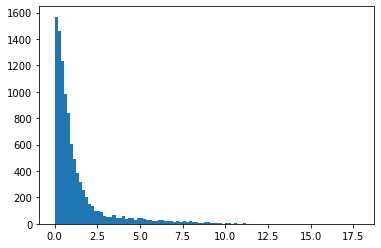

In [5]:
# ploting histogram to choose threshold
plt.figure()
plt.hist(abs(norm_diff),bins = 100)
plt.show()

In [6]:
# segmenting to many clusters base don the differences
from scipy.signal import find_peaks
peaks, _ = find_peaks(abs(norm_diff), height=2.5)
peaks_real = np.insert(peaks, 0, 0, axis=0)

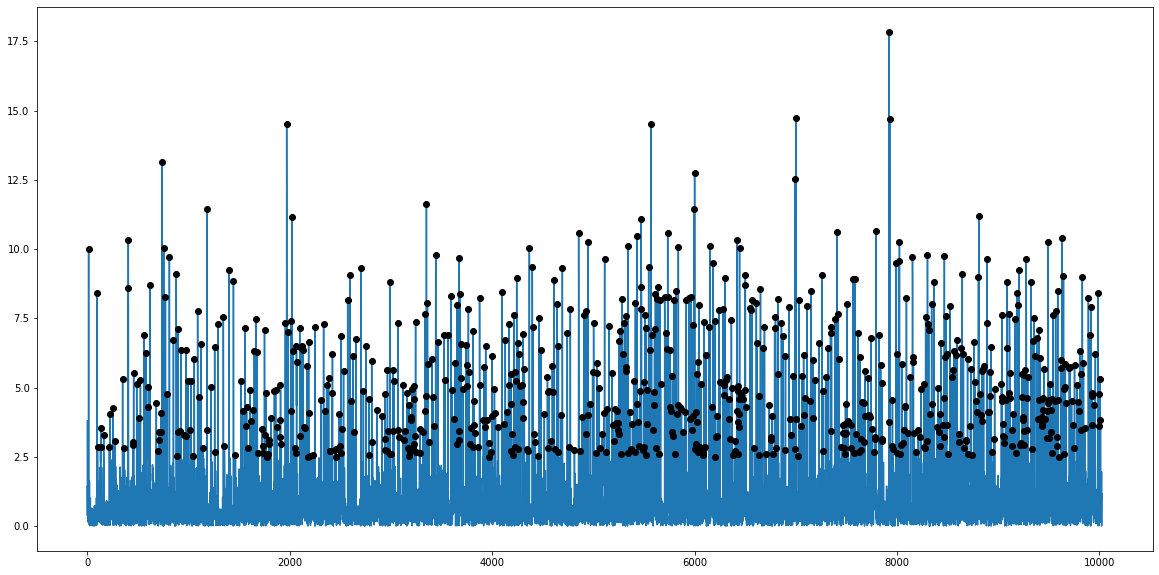

In [7]:
#Visualiziing differences bwtween frames and detected peaks
plt.figure(figsize= (20,10))
plt.plot(abs(norm_diff))
plt.plot(peaks, abs(norm_diff)[peaks],"ko")

In [8]:
indexes_inliers = np.where(out_mask==1)[0]
num_of_frames  = np.diff(peaks)

In [ ]:
similarity_matrix = np.zeros([780,780])
new_frames = np.double(new_frames)
num_of_clusters = len(peaks_real)
for b in range(num_of_clusters - 2):
    basis = new_frames[:,peaks_real[b]:peaks_real[b+1]]
    for i in range(b+1,num_of_clusters-1):
        feat = new_frames[:,peaks_real[i]:peaks_real[i+1]]
        pi = basis@(np.linalg.inv(basis.T @ basis))@basis.T 
        p = pi@feat
        r = (np.identity(512) - pi)@feat
        norm = LNG.norm(p,axis=0)
        norm_r = LNG.norm(r,axis=0)
        norm_f = LNG.norm(feat,axis=0)
        division_p = np.divide(norm,norm_f)
        mean_p = np.mean(division_p)
        #mean_norms.append(mean_p)
        similarity_matrix[b,i] = mean_p

